# L6 Intro and KNN

## 1. "Playing Tennis" Data

In [5]:
import pandas as pd
df = pd.read_csv("data/data_numeric_only.csv")
df

,YEAR,SC,CD,ACEREGIO,AGE65,BANK,BLACK,BLUCLLR,CITY,COAST,...,VABEDS,VETERANS,WHLRETL,PREVPARTY,PREVCANDVO,PREVTOTVO,PARTY,CANDIDATEVOTES,TOTALVOTES,ISTEST
0,1988.0,12.0,11.0,2.0,82185.0,41732.0,9785.0,27871.0,0.0,1.0,...,0.0,72883.0,52758.0,1.0,75037.0,110317.0,1.0,154654.0,219427.0,1.0
1,1996.0,71.0,30.0,16.0,45691.0,328500.0,19738.0,54562.0,1.0,0.0,...,0.0,2856770.0,59265.0,0.0,43943.0,66425.0,0.0,58283.0,80590.0,1.0
2,1996.0,25.0,2.0,7.0,61383.0,54200.0,11081.0,37299.0,0.0,0.0,...,200.0,517844.0,60067.0,1.0,133734.0,193249.0,1.0,154557.0,269374.0,1.0
3,1980.0,13.0,26.0,2.0,41684.0,164253.0,28044.0,54485.0,0.0,0.0,...,0.0,53248.0,32972.0,1.0,87059.0,139637.0,1.0,137159.0,184692.0,1.0
4,1994.0,14.0,17.0,2.0,76261.0,190400.0,37530.0,55038.0,0.0,0.0,...,486.0,1402128.0,58165.0,1.0,150158.0,216039.0,1.0,133788.0,133975.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3756,1992.0,23.0,5.0,3.0,75091.0,106000.0,48640.0,48794.0,0.0,1.0,...,97.0,973369.0,55276.0,1.0,126308.0,167498.0,0.0,147618.0,244992.0,0.0
3757,1986.0,40.0,9.0,4.0,93450.0,29834.0,12870.0,53664.0,0.0,0.0,...,0.0,55614.0,33076.0,0.0,102446.0,196956.0,0.0,59864.0,60466.0,0.0
3758,1980.0,49.0,5.0,13.0,38467.0,56879.0,79965.0,66127.0,1.0,0.0,...,0.0,55757.0,49945.0,0.0,35524.0,70593.0,0.0,70892.0,139035.0,0.0
3759,1984.0,21.0,2.0,7.0,56896.0,130219.0,364920.0,51687.0,1.0,1.0,...,0.0,52971.0,32461.0,0.0,140827.0,161794.0,0.0,155349.0,187215.0,0.0


### Data cleaning

In [6]:
df_train = df[df["ISTEST"] == 0]
df_train

,YEAR,SC,CD,ACEREGIO,AGE65,BANK,BLACK,BLUCLLR,CITY,COAST,...,VABEDS,VETERANS,WHLRETL,PREVPARTY,PREVCANDVO,PREVTOTVO,PARTY,CANDIDATEVOTES,TOTALVOTES,ISTEST
400,1984.0,71.0,44.0,16.0,69300.0,216356.0,73567.0,28544.0,0.0,1.0,...,0.0,63467.0,38993.0,0.0,78474.0,120825.0,0.0,99378.0,142561.0,0.0
401,1994.0,12.0,13.0,2.0,72077.0,100300.0,81983.0,66523.0,0.0,1.0,...,0.0,790452.0,56182.0,0.0,93670.0,145714.0,0.0,67688.0,95467.0,0.0
402,1994.0,1.0,3.0,1.0,79644.0,32900.0,65534.0,32123.0,0.0,1.0,...,444.0,362633.0,57145.0,0.0,112022.0,247531.0,0.0,111261.0,175355.0,0.0
403,1992.0,46.0,2.0,8.0,66510.0,24400.0,324340.0,37776.0,0.0,0.0,...,0.0,228493.0,35019.0,0.0,59393.0,70617.0,0.0,133361.0,174609.0,0.0
404,1996.0,13.0,1.0,2.0,68442.0,770500.0,23559.0,29344.0,0.0,1.0,...,0.0,1650271.0,59501.0,0.0,78692.0,184033.0,0.0,93816.0,235506.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3756,1992.0,23.0,5.0,3.0,75091.0,106000.0,48640.0,48794.0,0.0,1.0,...,97.0,973369.0,55276.0,1.0,126308.0,167498.0,0.0,147618.0,244992.0,0.0
3757,1986.0,40.0,9.0,4.0,93450.0,29834.0,12870.0,53664.0,0.0,0.0,...,0.0,55614.0,33076.0,0.0,102446.0,196956.0,0.0,59864.0,60466.0,0.0
3758,1980.0,49.0,5.0,13.0,38467.0,56879.0,79965.0,66127.0,1.0,0.0,...,0.0,55757.0,49945.0,0.0,35524.0,70593.0,0.0,70892.0,139035.0,0.0
3759,1984.0,21.0,2.0,7.0,56896.0,130219.0,364920.0,51687.0,1.0,1.0,...,0.0,52971.0,32461.0,0.0,140827.0,161794.0,0.0,155349.0,187215.0,0.0


In [7]:
df_test = df[df["ISTEST"] == 1]
df_test

,YEAR,SC,CD,ACEREGIO,AGE65,BANK,BLACK,BLUCLLR,CITY,COAST,...,VABEDS,VETERANS,WHLRETL,PREVPARTY,PREVCANDVO,PREVTOTVO,PARTY,CANDIDATEVOTES,TOTALVOTES,ISTEST
0,1988.0,12.0,11.0,2.0,82185.0,41732.0,9785.0,27871.0,0.0,1.0,...,0.0,72883.0,52758.0,1.0,75037.0,110317.0,1.0,154654.0,219427.0,1.0
1,1996.0,71.0,30.0,16.0,45691.0,328500.0,19738.0,54562.0,1.0,0.0,...,0.0,2856770.0,59265.0,0.0,43943.0,66425.0,0.0,58283.0,80590.0,1.0
2,1996.0,25.0,2.0,7.0,61383.0,54200.0,11081.0,37299.0,0.0,0.0,...,200.0,517844.0,60067.0,1.0,133734.0,193249.0,1.0,154557.0,269374.0,1.0
3,1980.0,13.0,26.0,2.0,41684.0,164253.0,28044.0,54485.0,0.0,0.0,...,0.0,53248.0,32972.0,1.0,87059.0,139637.0,1.0,137159.0,184692.0,1.0
4,1994.0,14.0,17.0,2.0,76261.0,190400.0,37530.0,55038.0,0.0,0.0,...,486.0,1402128.0,58165.0,1.0,150158.0,216039.0,1.0,133788.0,133975.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1994.0,12.0,9.0,2.0,95583.0,100300.0,37898.0,38903.0,0.0,1.0,...,0.0,790452.0,71349.0,0.0,139188.0,238704.0,0.0,99984.0,159888.0,1.0
396,1990.0,49.0,1.0,13.0,135565.0,152838.0,103221.0,49587.0,0.0,0.0,...,0.0,66124.0,40759.0,0.0,122566.0,196923.0,0.0,89241.0,146195.0,1.0
397,1986.0,71.0,14.0,16.0,89843.0,216356.0,7276.0,29659.0,0.0,0.0,...,0.0,78167.0,46870.0,1.0,179238.0,244472.0,1.0,146906.0,205161.0,1.0
398,1984.0,22.0,9.0,4.0,89474.0,36268.0,10280.0,60054.0,0.0,0.0,...,0.0,65702.0,41245.0,0.0,121094.0,180539.0,0.0,137018.0,210340.0,1.0


## 2. K Nearest Neighbors

In [8]:
from sklearn import preprocessing

#This transformer should be used to encode target values, i.e. y, and not the input X.
#But... here is an exception...
#le = preprocessing.LabelEncoder()

df_encoded = pd.read_csv("data/data_numeric_only.csv")
'''df_encoded["Outlook"] = le.fit_transform(df_encoded["Outlook"])
df_encoded["Temperature"] = le.fit_transform(df_encoded["Temperature"])
df_encoded["Humidity"] = le.fit_transform(df_encoded["Humidity"])
df_encoded["Windy"] = le.fit_transform(df_encoded["Windy"])
df_encoded["Playing Tennis"] = le.fit_transform(df_encoded["Playing Tennis"])'''

X_headers = df.columns[:-4]
y_headers = df.columns[-4:-3]
#train_headers
# last 3 are for test

X_train = df_encoded[df_encoded["ISTEST"] == 0][X_headers]
X_train

,YEAR,SC,CD,ACEREGIO,AGE65,BANK,BLACK,BLUCLLR,CITY,COAST,...,TRANSPRT,UNEMPLYD,UNION,URBAN,VABEDS,VETERANS,WHLRETL,PREVPARTY,PREVCANDVO,PREVTOTVO
400,1984.0,71.0,44.0,16.0,69300.0,216356.0,73567.0,28544.0,0.0,1.0,...,6296.0,17812.0,25.4,525690.0,0.0,63467.0,38993.0,0.0,78474.0,120825.0
401,1994.0,12.0,13.0,2.0,72077.0,100300.0,81983.0,66523.0,0.0,1.0,...,-1.0,28304.0,19.9,594875.0,0.0,790452.0,56182.0,0.0,93670.0,145714.0
402,1994.0,1.0,3.0,1.0,79644.0,32900.0,65534.0,32123.0,0.0,1.0,...,-1.0,15214.0,18.9,472578.0,444.0,362633.0,57145.0,0.0,112022.0,247531.0
403,1992.0,46.0,2.0,8.0,66510.0,24400.0,324340.0,37776.0,0.0,0.0,...,5635.0,22269.0,9.3,36186.0,0.0,228493.0,35019.0,0.0,59393.0,70617.0
404,1996.0,13.0,1.0,2.0,68442.0,770500.0,23559.0,29344.0,0.0,1.0,...,14497.0,13153.0,35.8,468550.0,0.0,1650271.0,59501.0,0.0,78692.0,184033.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3756,1992.0,23.0,5.0,3.0,75091.0,106000.0,48640.0,48794.0,0.0,1.0,...,6963.0,25564.0,33.7,264700.0,97.0,973369.0,55276.0,1.0,126308.0,167498.0
3757,1986.0,40.0,9.0,4.0,93450.0,29834.0,12870.0,53664.0,0.0,0.0,...,6226.0,15277.0,10.9,158857.0,0.0,55614.0,33076.0,0.0,102446.0,196956.0
3758,1980.0,49.0,5.0,13.0,38467.0,56879.0,79965.0,66127.0,1.0,0.0,...,7963.0,6542.0,15.8,461771.0,0.0,55757.0,49945.0,0.0,35524.0,70593.0
3759,1984.0,21.0,2.0,7.0,56896.0,130219.0,364920.0,51687.0,1.0,1.0,...,18404.0,29348.0,27.5,519566.0,0.0,52971.0,32461.0,0.0,140827.0,161794.0


In [9]:
import pandas as pd
df = pd.read_csv("data/data_numeric_only.csv")
df.astype(float)

X_headers = df.columns[:-4]
y_headers = "PARTY"

y_train = df_encoded[df_encoded["ISTEST"] == 0][y_headers]
X_test = df_encoded[df_encoded["ISTEST"] == 1][X_headers]
y_test = df_encoded[df_encoded["ISTEST"] == 1][y_headers]
y_test

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
395    0.0
396    0.0
397    1.0
398    0.0
399    0.0
Name: PARTY, Length: 400, dtype: float64

### Training KNN Classifiers

In [10]:
'''from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

clf = KNeighborsClassifier() # n_neighbors=5
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))'''

'from sklearn.neighbors import KNeighborsClassifier\nfrom sklearn import metrics\n\nclf = KNeighborsClassifier() # n_neighbors=5\nclf.fit(X_train, y_train)\ny_pred = clf.predict(X_test)\nprint("Predicted:", y_pred)\nprint("Accuracy:", metrics.accuracy_score(y_test, y_pred))'

In [11]:
'''from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

clf = KNeighborsClassifier(n_neighbors=3) # n_neighbors=3
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

y_pred_knn = y_pred'''

'from sklearn.neighbors import KNeighborsClassifier\nfrom sklearn import metrics\n\nclf = KNeighborsClassifier(n_neighbors=3) # n_neighbors=3\nclf.fit(X_train, y_train)\ny_pred = clf.predict(X_test)\nprint("Predicted:", y_pred)\nprint("Accuracy:", metrics.accuracy_score(y_test, y_pred))\n\ny_pred_knn = y_pred'

# L7 Decision Trees

Scikit-learn implementation does not support categorical variables for now.

## 1. ID3: based on Information Gain

In [17]:
from sklearn import tree
import graphviz

df.fillna(value=0.0)
df

X_headers = df.columns[:-4]
y_headers = df.columns[-4:-3]

#for row_index, row in df.iterrows():
#    for col in df.columns:
#        try:
#            row[col] = float(row[col])
#            break
#        except ValueError:
#             print(f'{row_index} {col}')

# "entropy" for the information gain
clf = tree.DecisionTreeClassifier(criterion="entropy")
#X_train

#y_train

clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X_headers,
                                class_names="DR",
                                filled=True, rounded=True,
                                special_characters=True)
#graph = graphviz.Source(dot_data)
#graph

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [31]:
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## 2. CART: based on Gini (as default)

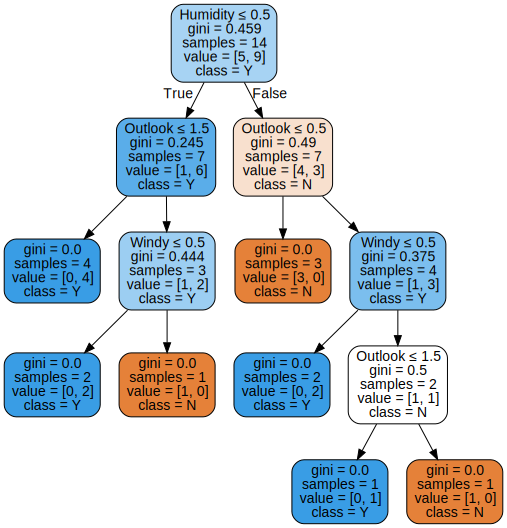

In [11]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=["Outlook", "Temperature", "Humidity", "Windy"],
                                class_names="NY",
                                filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)
graph 

In [12]:
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

y_pred_tree = y_pred

Predicted: [1 1 1 0 0 0 0 0 0 1 1 1 1]
Accuracy: 0.6923076923076923


## 3. Underfitting and Overfitting: max_depth

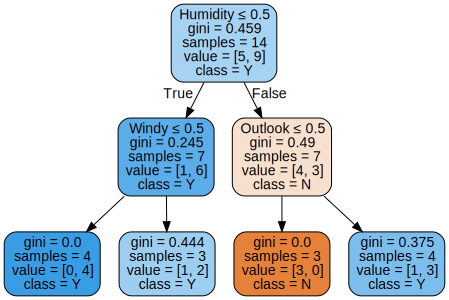

In [13]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=["Outlook", "Temperature", "Humidity", "Windy"],
                                class_names="NY",
                                filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)
graph 

In [14]:
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Predicted: [1 1 1 1 1 1 0 0 0 1 1 1 1]
Accuracy: 0.6153846153846154


# L8 Naive Bayes

BernoulliNB is designed for **binary/boolean features**.

MultinomialNB is suitable for classification with **discrete features** (e.g., **word counts** for text classification).

CategoricalNB is suitable for classification with **discrete features** that are **categorically distributed**.

GaussianNB is designed for **numerical features**: The likelihood of the features is assumed to be Gaussian.

In [15]:
from sklearn.naive_bayes import CategoricalNB

clf = CategoricalNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

y_pred_bayes = y_pred

Predicted: [0 1 1 0 0 0 0 0 0 0 1 1 1]
Accuracy: 0.6923076923076923


Pay attention to the prediction on the first test example. (Compare with KNN and Decision Trees)

# L9 SVM and Kernels

## 1. Support Vector Classification

### Linear SVM

When C=1.0 as default:

In [16]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

y_pred_svm = y_pred

Predicted: [1 1 1 0 0 0 0 0 0 1 1 1 0]
Accuracy: 0.7692307692307693


When C=0.1, allowing more errors:

In [17]:
clf = LinearSVC(C=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Predicted: [1 1 1 1 1 1 0 0 0 1 1 1 1]
Accuracy: 0.6153846153846154


When C=0.01, allowing many errors:

In [18]:
clf = LinearSVC(C=0.01)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Predicted: [1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy: 0.5384615384615384


### Kernel SVM

When kernel='rbf' (Radius Basis Function: Gaussian):

In [19]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Predicted: [1 1 1 1 1 1 0 0 1 1 1 1 1]
Accuracy: 0.6923076923076923


When kernel is Quadratic kernel ("Degree-2 polynomial kernel"):

In [20]:
clf = SVC(kernel='poly', degree=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

y_pred_kernel = y_pred

Predicted: [1 1 1 0 0 0 0 1 1 1 1 1 0]
Accuracy: 0.7692307692307693


# L10 Evaluation

Ground truth: y_test

Predicted:
* KNN: y_pred_knn

* Decision Tree (CART): y_pred_tree

* Naive Bayes: y_pred_bayes

* Linear SVM: y_pred_svm

* Kernel SVM (Degree-2 poly): y_pred_kernel

In [21]:
## 1. Confusion matrix anc F1 score

Take KNN classifier as an example.

Confusion matrix, whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and prediced label being j-th class: array([[TN, FN], [FP, TP]])

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_knn)

array([[4, 2],
       [0, 7]])

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 score:", f1_score(y_test, y_pred_knn))

Precision: 0.7777777777777778
Recall: 1.0
F1 score: 0.8750000000000001


## 2. ROC curve

In [24]:
from itertools import cycle

n_methods = 5
methods = ["KNN", "CART", "Naive Bayes", "Linear SVM", "Kernel SVM"]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

In [25]:
from sklearn.metrics import roc_curve

fpr = dict()
tpr = dict()

fpr[0], tpr[0], _ = roc_curve(y_test, y_pred_knn)
fpr[1], tpr[1], _ = roc_curve(y_test, y_pred_tree)
fpr[2], tpr[2], _ = roc_curve(y_test, y_pred_bayes)
fpr[3], tpr[3], _ = roc_curve(y_test, y_pred_svm)
fpr[4], tpr[4], _ = roc_curve(y_test, y_pred_kernel)

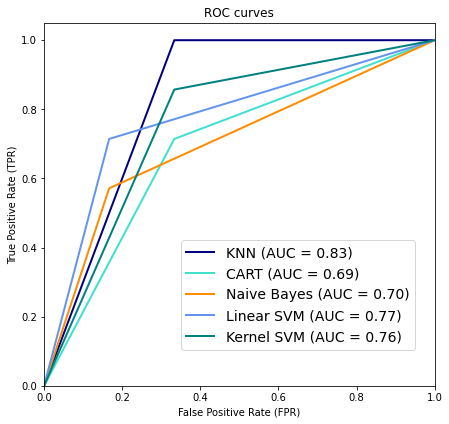

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc

plt.figure(figsize=(7, 8))
lines = []
labels = []

for i, color in zip(range(n_methods), colors):
    l, = plt.plot(fpr[i], tpr[i], color=color, lw=2)
    lines.append(l)
    labels.append('{0} (AUC = {1:0.2f})'.format(methods[i], auc(fpr[i], tpr[i])))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curves')
plt.legend(lines, labels, loc=(.35, .1), prop=dict(size=14))

plt.show()

## 3. Precision-Recall curve

In [27]:
from sklearn.metrics import precision_recall_curve

precision = dict()
recall = dict()

precision[0], recall[0], _ = precision_recall_curve(y_test, y_pred_knn)
precision[1], recall[1], _ = precision_recall_curve(y_test, y_pred_tree)
precision[2], recall[2], _ = precision_recall_curve(y_test, y_pred_bayes)
precision[3], recall[3], _ = precision_recall_curve(y_test, y_pred_svm)
precision[4], recall[4], _ = precision_recall_curve(y_test, y_pred_kernel)

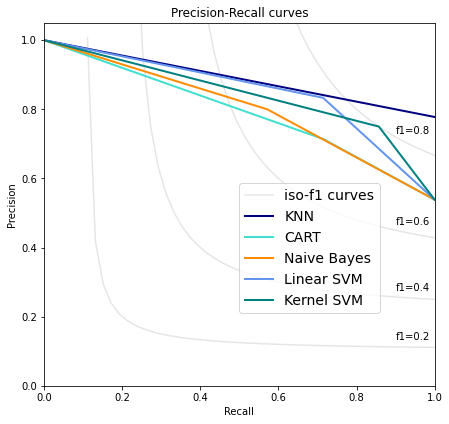

In [28]:
plt.figure(figsize=(7, 8))
lines = []
labels = []

f_scores = np.linspace(0.2, 0.8, num=4)
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))
lines.append(l)
labels.append('iso-f1 curves')

for i, color in zip(range(n_methods), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append(methods[i])

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curves')
plt.legend(lines, labels, loc=(.5, .2), prop=dict(size=14))

plt.show()

# L11 Ensemble Methods

## 1. Random Forest (Bagging: Bootstrapp AGgregating)

In [29]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_samples=0.4, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Predicted: [1 1 1 0 0 0 0 0 1 1 1 1 0]
Accuracy: 0.8461538461538461


## 2. AdaBoost (Boosting)

In [30]:
from sklearn.ensemble import AdaBoostClassifier

# default: base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.0
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=3), learning_rate=0.1, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Predicted: [1 1 1 0 0 0 0 0 0 0 1 1 0]
Accuracy: 0.8461538461538461


# L12 Artificial Neural Networks

## Multi-Layer Perceptron (MLP)

In [31]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=200, tol=0.001, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Predicted: [1 1 1 1 1 1 1 0 1 1 1 1 1]
Accuracy: 0.6153846153846154


In [32]:
clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, tol=0.0003, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Predicted: [1 1 1 1 0 0 0 0 1 1 1 1 0]
Accuracy: 0.7692307692307693


In [33]:
clf = MLPClassifier(hidden_layer_sizes=(10,3,), max_iter=1000, tol=0.0003, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Predicted: [1 1 1 0 0 0 0 0 1 0 1 1 0]
Accuracy: 0.9230769230769231
